### Loac Sanction Amount Data - The dataset consists of information about 1000 customers applied for the home loan.

* Customer ID - 
* Name- 
* Gender - 
* Age - 
* Income (USD) - 
* Income Stability - 
* Profession
* Type of Employment
* Location
* Loan Amount Request (USD)
* Current Loan Expenses (USD)
* Expense Type 1
* Expense Type 2
* Dependents
* Credit Score
* No. of Defaults
* Has Active Credit Card
* Property ID
* Property Age
* Property Type
* Property Location 
* Co-Applicant
* Property Price
* Loan Sanction Amount (USD)'

In [48]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)

df=pd.read_csv("data_set.csv")

df.head()


,Customer ID,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-40730,M,33,2731.31,Low,Working,NaN,Semi-Urban,74167.78,370.02,2.0,635.48,Inactive,2731.31,3,Rural,1,117586.49,0.00
1,C-17328,M,45,2480.23,Low,State servant,IT staff,Urban,53423.39,173.75,3.0,NaN,Unpossessed,2480.23,2,Rural,1,60652.57,37396.37
2,C-31881,M,18,3031.68,Low,Commercial associate,Laborers,Urban,93540.25,957.45,2.0,709.87,Inactive,3031.68,3,Rural,1,165114.92,60801.16
3,C-4884,F,59,1297.93,Low,Working,Accountants,Urban,72452.30,791.52,4.0,740.95,Active,1297.93,3,Urban,1,120739.20,50716.61
4,C-28839,F,41,2165.17,Low,Commercial associate,NaN,Semi-Urban,59061.80,280.79,2.0,724.65,Inactive,2165.17,4,Urban,1,-999.00,41343.26


### 1. Read the dataset(Loan Sanction data) answer the questions below
  
 A) Display the categorical and Numerical columns? (1 Marks)
  
 B) Check if there any mismatch in the data values and the Data type of the column. Convert the columns in other datatype if required (2 Marks)
  
 C) Split the Dataset into Train and Test. Statically prove that Training and Testing Data represent population? (2 Marks)"

#### A) Display the categorical and Numerical columns?

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split


cat_cols=df.select_dtypes(include=["object"]).columns
num_cols=df.select_dtypes(exclude=["object"]).columns

print("categorical columns:")
print(cat_cols)
print()
print("numeric columns:")
print(num_cols)

categorical columns:
Index(['Customer ID', 'Gender', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Has Active Credit Card',
       'Property Location'],
      dtype='object')

numeric columns:
Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'Property Age', 'Property Type', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')


#### B). Check if there any mismatch in the data values and the Data type of the column. Convert the columns in other datatype if required 

In [4]:
print("\nData types before conversion")
print(df.dtypes)


Data types before conversion
Customer ID                     object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Dependents                     float64
Credit Score                   float64
Has Active Credit Card          object
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object


In [5]:
df["Dependents"].fillna(0,inplace=True)

In [6]:
df["Dependents"]=df["Dependents"].astype(int)

In [7]:
print("\nData types after conversion")
print(df.dtypes)


Data types after conversion
Customer ID                     object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Dependents                       int64
Credit Score                   float64
Has Active Credit Card          object
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object


##### C) Split the Dataset into Train and Test. Also give us the reason behind your split 
    
   Assume `'Loan Sanction Amount (USD)'` Column to be the Target variable 

In [8]:
X=df.drop(columns=["Loan Sanction Amount (USD)"])
y=df["Loan Sanction Amount (USD)"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

I used 70% of the data for tarining and 30% for testing. This is common practice in machine learning to balance the performance of the model and to generalise.
I used random state  set to 42 for reproducibility, ensuring that the split is consitent across multiple runs of the code

### 2. Read the dataset(Loan Sanction data) answer the questions below
    
A) Display percentage of negative values in each column rounded upto two decimal places

B) Determine the presence of invalid/garbage values in the dataset and replace them with NaN 

#### A) Display percentage of negative values in each column rounded upto two decimal places

In [9]:
num_cols=df.select_dtypes(include=["int","float"]).columns
negative_percentage=(df[num_cols] < 0).mean()*100

In [10]:
negative_percentage=negative_percentage.round(2)
negative_percentage

Age                            0.0
Income (USD)                   0.0
Loan Amount Request (USD)      0.0
Current Loan Expenses (USD)    0.7
Dependents                     0.0
Credit Score                   0.0
Property Age                   0.0
Property Type                  0.0
Co-Applicant                   0.9
Property Price                 1.0
Loan Sanction Amount (USD)     1.2
dtype: float64

#### B) Determine the presence of invalid/garbage values in the dataset and replace them with NaN 

In [11]:
df.head(4)

,Customer ID,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-40730,M,33,2731.31,Low,Working,NaN,Semi-Urban,74167.78,370.02,2,635.48,Inactive,2731.31,3,Rural,1,117586.49,0.00
1,C-17328,M,45,2480.23,Low,State servant,IT staff,Urban,53423.39,173.75,3,NaN,Unpossessed,2480.23,2,Rural,1,60652.57,37396.37
2,C-31881,M,18,3031.68,Low,Commercial associate,Laborers,Urban,93540.25,957.45,2,709.87,Inactive,3031.68,3,Rural,1,165114.92,60801.16
3,C-4884,F,59,1297.93,Low,Working,Accountants,Urban,72452.30,791.52,4,740.95,Active,1297.93,3,Urban,1,120739.20,50716.61


In [12]:
df.replace(["Nan","Nan/"],pd.NA,inplace=True)
df.isnull().sum()

Customer ID                      0
Gender                           3
Age                              0
Income (USD)                   173
Income Stability                59
Profession                       0
Type of Employment             255
Location                         0
Loan Amount Request (USD)        0
Current Loan Expenses (USD)      3
Dependents                       0
Credit Score                    55
Has Active Credit Card          65
Property Age                   183
Property Type                    0
Property Location               16
Co-Applicant                     0
Property Price                   0
Loan Sanction Amount (USD)      11
dtype: int64

## 3. Read the dataset(Loan Sanction data) answer the questions below
#### A) Display the %of missing values in each column.

#### B) Replace missing values with appropriate values

#### A) Display the %of missing values in each column.(1 marks)

In [13]:
missing_percent=(df.isnull().sum()/len(df))*100
missing_percent

Customer ID                     0.0
Gender                          0.3
Age                             0.0
Income (USD)                   17.3
Income Stability                5.9
Profession                      0.0
Type of Employment             25.5
Location                        0.0
Loan Amount Request (USD)       0.0
Current Loan Expenses (USD)     0.3
Dependents                      0.0
Credit Score                    5.5
Has Active Credit Card          6.5
Property Age                   18.3
Property Type                   0.0
Property Location               1.6
Co-Applicant                    0.0
Property Price                  0.0
Loan Sanction Amount (USD)      1.1
dtype: float64

Income (USD) has 17.3 % ,Income Stability  has 5.9%,Type of Employment has 25.5% and proprty age has 18.3% missing values

#### B) Replace missing values with appropriate values

In [14]:
num_cols=df.select_dtypes(include=["int","float"]).columns
df[num_cols]=df[num_cols].fillna(df[num_cols].mean())

In [15]:
cat_cols=df.select_dtypes(include=["object"]).columns
df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [16]:
missing_percent=(df.isnull().sum()/len(df))*100
missing_percent

Customer ID                    0.0
Gender                         0.0
Age                            0.0
Income (USD)                   0.0
Income Stability               0.0
Profession                     0.0
Type of Employment             0.0
Location                       0.0
Loan Amount Request (USD)      0.0
Current Loan Expenses (USD)    0.0
Dependents                     0.0
Credit Score                   0.0
Has Active Credit Card         0.0
Property Age                   0.0
Property Type                  0.0
Property Location              0.0
Co-Applicant                   0.0
Property Price                 0.0
Loan Sanction Amount (USD)     0.0
dtype: float64

## 4. Read the dataset(Loan Sanction data) answer the questions below

#### A) Plot correlation Heat map for the dataset and indetify the features impacting Target variables

#### B) Is multicollinearity present in the dataset?

<IPython.core.display.Javascript object>

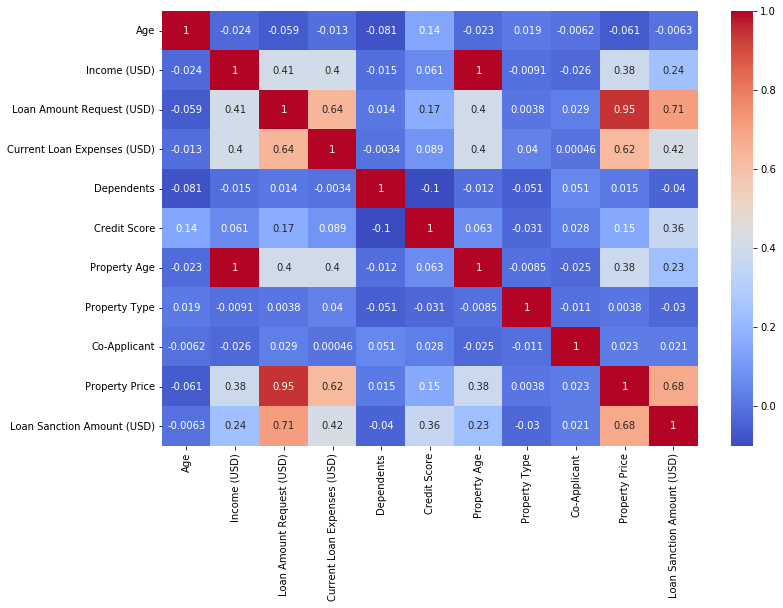

In [39]:
import matplotlib.pyplot as plt
correlation_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.show()

 the features impacting Target variables are
 
1) Loan Amount reguest(USD) - strong positive
2) property price - strong positive

yes, multicollinearity present in the dataset between

1)income and property age

2)loan request amount and current loan expenses

3)property price and loan amount request

4)3)property price and loan sanction amount

# 5. Read the dataset(Loan Sanction data) answer the questions below 

In [18]:
df.head(3)

,Customer ID,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-40730,M,33,2731.31,Low,Working,Laborers,Semi-Urban,74167.78,370.02,2,635.480000,Inactive,2731.31,3,Rural,1,117586.49,0.00
1,C-17328,M,45,2480.23,Low,State servant,IT staff,Urban,53423.39,173.75,3,738.511418,Unpossessed,2480.23,2,Rural,1,60652.57,37396.37
2,C-31881,M,18,3031.68,Low,Commercial associate,Laborers,Urban,93540.25,957.45,2,709.870000,Inactive,3031.68,3,Rural,1,165114.92,60801.16


### A) Identiy top 5 and bottom 5 employment type wrt income and visualise it using appropriate plot 


In [53]:
employement_type=df.groupby("Type of Employment")["Income (USD)"].mean().sort_values()
employement_type

Type of Employment
Cleaning staff           1808.815556
Security staff           1923.875333
Waiters/barmen staff     2214.683333
Private service staff    2233.980000
Secretaries              2244.870000
Sales staff              2282.418772
Cooking staff            2293.636250
Low-skill Laborers       2314.470000
Laborers                 2421.260753
Core staff               2459.842674
Medicine staff           2469.407200
IT staff                 2480.230000
Drivers                  2568.873415
Accountants              2582.023333
High skill tech staff    2635.350500
HR staff                 2910.770000
Managers                 3547.242903
Realty agents                    NaN
Name: Income (USD), dtype: float64

In [54]:
top_5=employement_type.tail(5)
top_5

Type of Employment
Accountants              2582.023333
High skill tech staff    2635.350500
HR staff                 2910.770000
Managers                 3547.242903
Realty agents                    NaN
Name: Income (USD), dtype: float64

In [51]:
botton_5=employement_type.head(5)
botton_5

Type of Employment
Cleaning staff           1808.815556
Security staff           1923.875333
Waiters/barmen staff     2214.683333
Private service staff    2233.980000
Secretaries              2244.870000
Name: Income (USD), dtype: float64

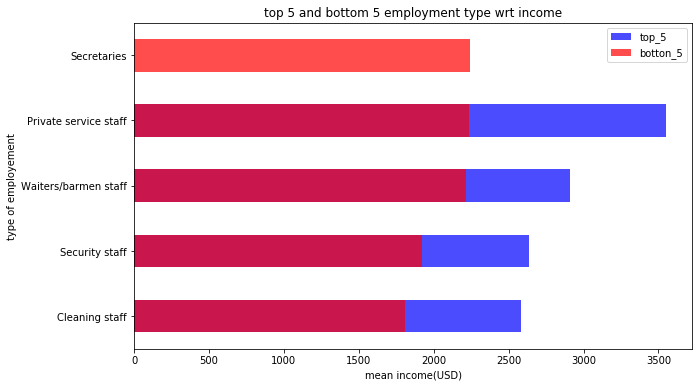

In [52]:
plt.figure(figsize=(10,6))
top_5.plot(kind="barh",color='blue',alpha=0.7, label='top_5')
botton_5.plot(kind="barh",color='red',alpha=0.7, label='botton_5')
plt.xlabel("mean income(USD)")
plt.ylabel("type of employement")
plt.title("top 5 and bottom 5 employment type wrt income")
plt.legend()
plt.show()

## 6. Read the dataset(Loan Sanction data) answer the questions below

### A) Identify the trend between loan between features given below and write your inferences 
- Current loan Expenses and Loan Sanction Amount
- Credit score and Loan Sanction Amount

### B) Identify percentage of peaple in has active credit card class as per each location and using appropriate plot visualize it.

In [23]:
df.head(2)

,Customer ID,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-40730,M,33,2731.31,Low,Working,Laborers,Semi-Urban,74167.78,370.02,2,635.480000,Inactive,2731.31,3,Rural,1,117586.49,0.00
1,C-17328,M,45,2480.23,Low,State servant,IT staff,Urban,53423.39,173.75,3,738.511418,Unpossessed,2480.23,2,Rural,1,60652.57,37396.37


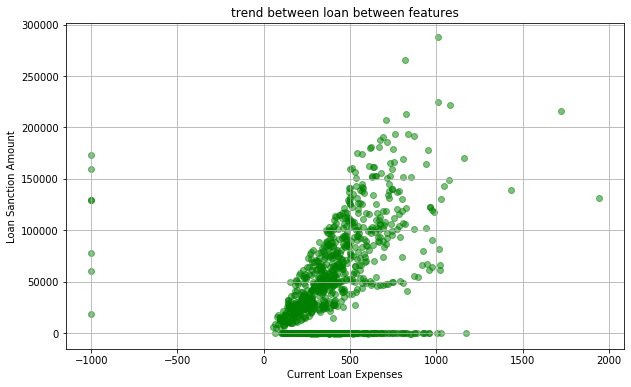

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df["Current Loan Expenses (USD)"],df["Loan Sanction Amount (USD)"], color='green',alpha=0.5)
plt.xlabel("Current Loan Expenses")
plt.ylabel("Loan Sanction Amount")
plt.title("trend between loan between features")
plt.grid(True)
plt.show()

In general, as "Current Loan Expenses" from 1usd  to 1000usd increases,"Loan Sanction Amount" increases 1usd to 200000usd
indicating positive correlation

but we have certain outliers who doesnot follow this treand

At "Current Loan Expenses" = -1000, we have some outliers 

we also have some outliers where "Current Loan Expenses" is between 1usd  to 1000usd ,"Loan Sanction Amount" is 0 usd

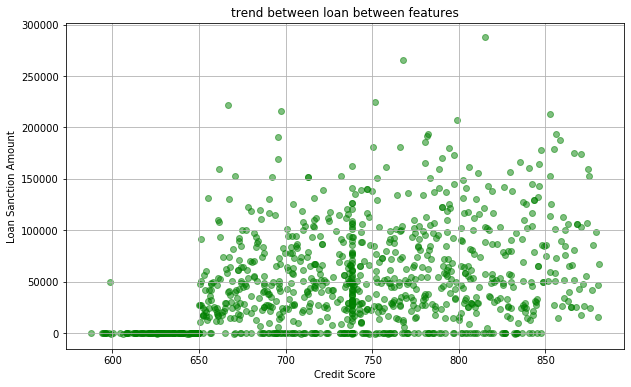

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df["Credit Score"],df["Loan Sanction Amount (USD)"], color='green',alpha=0.5)
plt.xlabel("Credit Score")
plt.ylabel("Loan Sanction Amount")
plt.title("trend between loan between features")
plt.grid(True)
plt.show()

Here we can infer from the graph that there is no proper relationship between  credit score and loan sanction amount
as we can see that the data points are randomly scattered.

In [26]:
df["Has Active Credit Card"].unique()

array(['Inactive', 'Unpossessed', 'Active'], dtype=object)

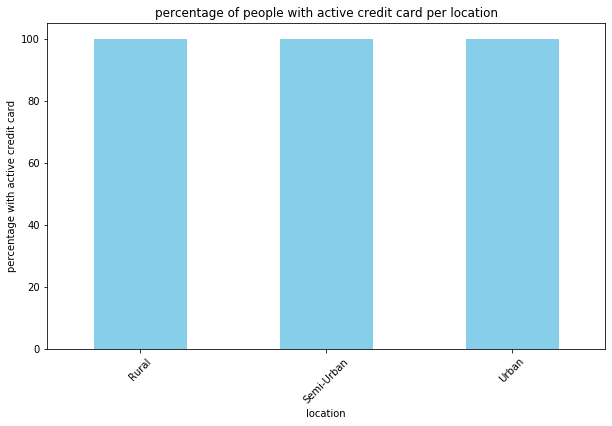

In [27]:
credit_per=df.groupby(["Location","Has Active Credit Card"]).size().unstack()
credit_per["percentage"]=(credit_per["Active"]/(credit_per["Active"]+credit_per.get("inactive",0)))*100

plt.figure(figsize=(10,6))
credit_per["percentage"].plot(kind="bar",color="skyblue")
plt.xlabel("location")
plt.ylabel("percentage with active credit card")
plt.title("percentage of people with active credit card per location")
plt.xticks(rotation=45)
plt.show()

#### A. Make a distribution plot for all the features and provide insights on it

#### B. Write a code for following. 
    - Divide the Age into bins such that now there will be 3 categories of ages with labels as Young, middle aged and old..
    - Make a new column Age_Groups.
    - Provide inference on how the Age_groups are distributed with respect to the income, also use a plot to show the relationship.


#### C. Find the average price of the property based on its type, Propertly location also use a plot to show the relationship  : 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

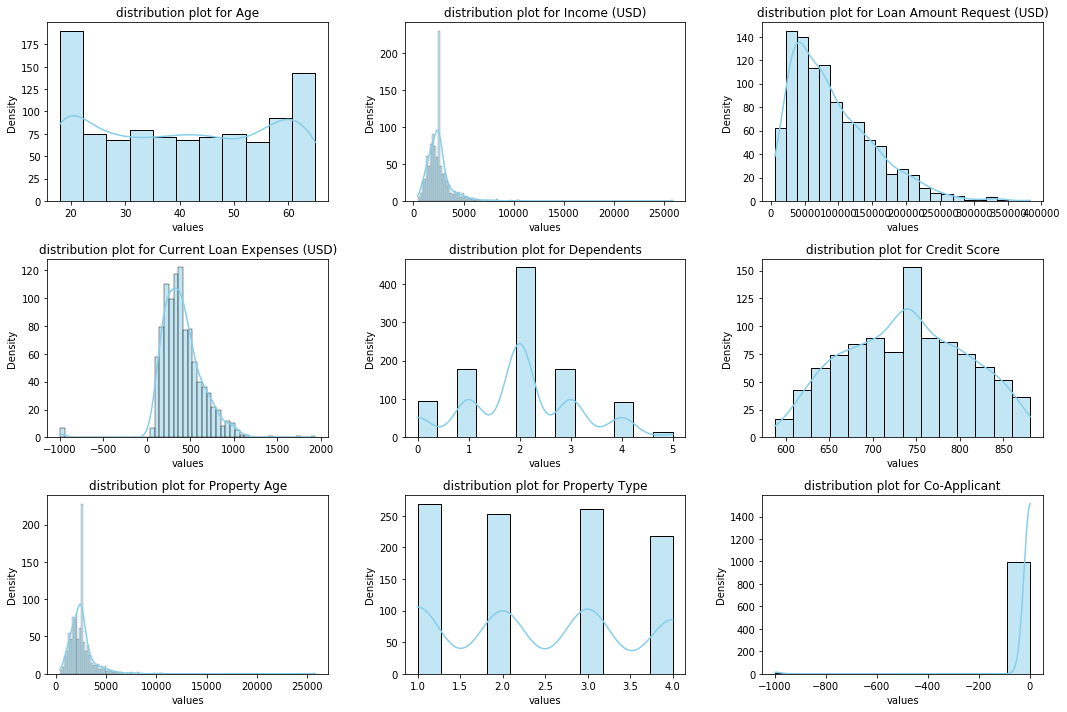

In [28]:
num_cols=df.select_dtypes(include=["int","float"]).columns
plt.figure(figsize=(15,10))
for i,column in enumerate(num_cols):
    if i<9:
        plt.subplot(3,3,i+1)
        sns.histplot(df[column],kde=True,color="skyblue")

        plt.xlabel("values")
        plt.ylabel("Density")
        plt.title(f"distribution plot for {column}")
plt.tight_layout()
plt.show()

We can infer from the above graphs that 
"credit score" ,"current loan expenses(USD)" and "Dependents" are normally distributed

income, property age, loan amount request(USD) are right skewed

co-applicant is left skewed


In [29]:
def categorise_age(age):
    if age < 30:
        return "Young"
    elif age<=60:
        return "Middle-aged"
    else:
        return "Old"

In [30]:
df["Age_groups"]=df["Age"].apply(categorise_age)
df["Age_groups"].unique()

array(['Middle-aged', 'Young', 'Old'], dtype=object)

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


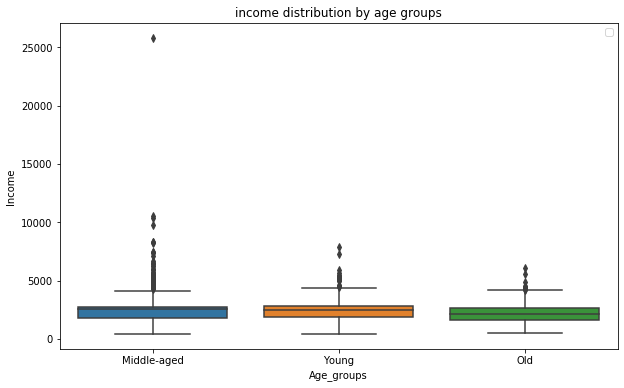

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Age_groups",y="Income (USD)",data=df)
plt.xlabel("Age_groups")
plt.ylabel("Income ")
plt.title("income distribution by age groups")
plt.legend()
plt.show()

Maximum income across all age groups is around 4500 usd
minimum income across all age groups is arond 500 usd

for middle-aged group,median is almost equal to 3rd quantile ie, most likely income is 3500usd for that particular group
for young-aged group,median is little less that 3rd ie, around most likely income is 3400 for that particular group
for old aged group, median lies exactly in the middle,that implies 50% data lies  below 3250 and  and 50% above 3250

we can see outliers in all age groups but more number of them in middle-aged group

In [32]:
avg_price=df.groupby(["Property Type","Property Location"])["Property Price"].mean().unstack()
avg_price

Property Location,Rural,Semi-Urban,Urban
Property Type,,,
1,135075.973933,137971.470571,134931.699867
2,138492.221829,126875.258351,130327.585405
3,135590.724048,131622.111236,149790.899195
4,136891.241892,128598.755000,140907.735000


<Figure size 720x432 with 0 Axes>

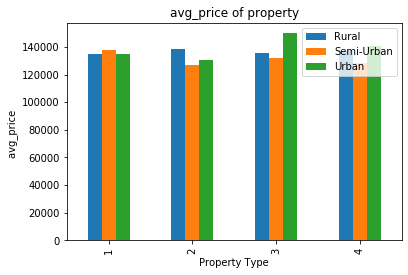

In [33]:
plt.figure(figsize=(10,6))

avg_price.plot(kind="bar")

plt.xlabel("Property Type")
plt.ylabel("avg_price ")
plt.title("avg_price of property")
plt.legend()
plt.show()

## Q 8.  Answer the Following questions
#### A. Explain Skewness and Kurtosis : 

#### B. Using the subplot display the histogram of Income and box plot.

#### C. If the outliers are in Income and data distribution is skewed. Apply the log to reduce the variation that the outlier values cause in the data set.


Skewness:

1)Skewness is the measure of asymmetry of the data distribution.

2)skewness value of 0 indicates a symmetric distribution , while positive skewness indicates right-skewed distibution(long tail on the right)  and negative skewness indicates left-skewed distibution(long tail on the left)

Kurtosis:
    
1)Kurtosis measures the peakedness or flatness of the distribution

2)Kurtosis value of 3 indicates a normal distribution(mesokurtic), while value greater than 3 indicate heavier tails(leptokurtic)
and while value lesser than 3 indicate lighter tails(platykurtic)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

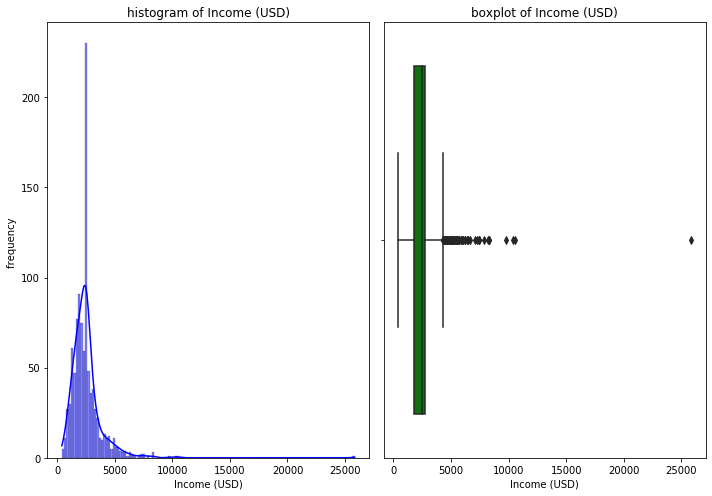

In [34]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.histplot(df["Income (USD)"],kde=True,color="blue")
plt.xlabel("Income (USD)")
plt.ylabel("frequency ")
plt.title("histogram of Income (USD)")

plt.subplot(1,2,2)
sns.boxplot(x="Income (USD)",data=df,color="green")
plt.xlabel("Income (USD)")

plt.title("boxplot of Income (USD)")

plt.tight_layout()
plt.show()

here the distribution is not normal and the data is postively skewed.also we have outliers

In [35]:
df["log_income"]=np.log(df["Income (USD)"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

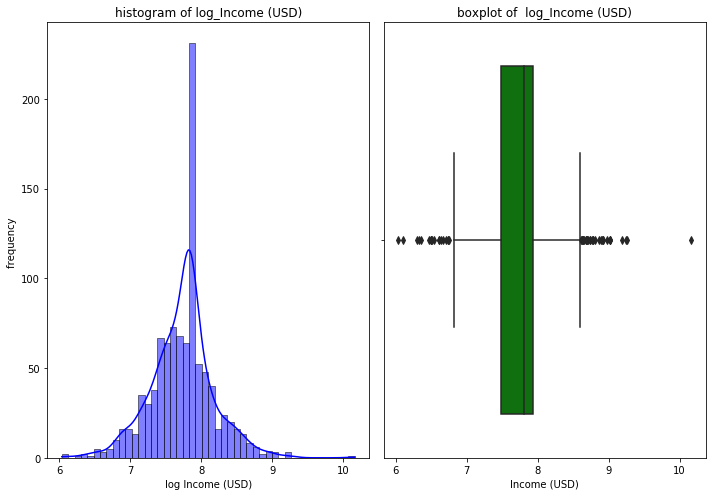

In [36]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.histplot(df["log_income"],kde=True,color="blue")
plt.xlabel("log Income (USD)")
plt.ylabel("frequency ")
plt.title("histogram of log_Income (USD)")

plt.subplot(1,2,2)
sns.boxplot(x="log_income",data=df,color="green")
plt.xlabel("Income (USD)")

plt.title("boxplot of  log_Income (USD)")

plt.tight_layout()
plt.show()

after appling log tranformation, the distribution became normal